In [1]:
import os
import pandas as pd
from rdkit import Chem
import csv

DATA = os.path.abspath("../data")
OUTPUT_PATH = os.path.join(DATA, "generated", "zairachem")

In [90]:
df = pd.read_csv(os.path.join(DATA, "pocketvec_inchi.csv"))

In [91]:
df.columns = ["id", "inchi"]

In [92]:
mols = [Chem.MolFromInchi(m) for m in list(df["inchi"])]
df["smiles"] = [Chem.MolToSmiles(m) for m in mols]

In [93]:
from standardiser import standardise

In [94]:
mols_std = []
for m in mols:
    try:
        mol = standardise.run(m)
    except:
        mol = None
    mols_std += [mol]

In [95]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem import QED

In [96]:
macro = Chem.MolFromSmarts("[r{12-}]")

for i, m in enumerate(mols_std):
    if m is None:
        continue
    mw = MolWt(m)
    if mw < 100 or mw > 1000:
        mols_std[i] = None
        continue
    if m.HasSubstructMatch(macro):
        mols_std[i] = None
        continue
    if m.GetRingInfo().NumRings() < 1:
        mols_std[i] = None
        continue
    if QED.qed(m) < 0.4:
        mols_std[i] = None
        continue
        

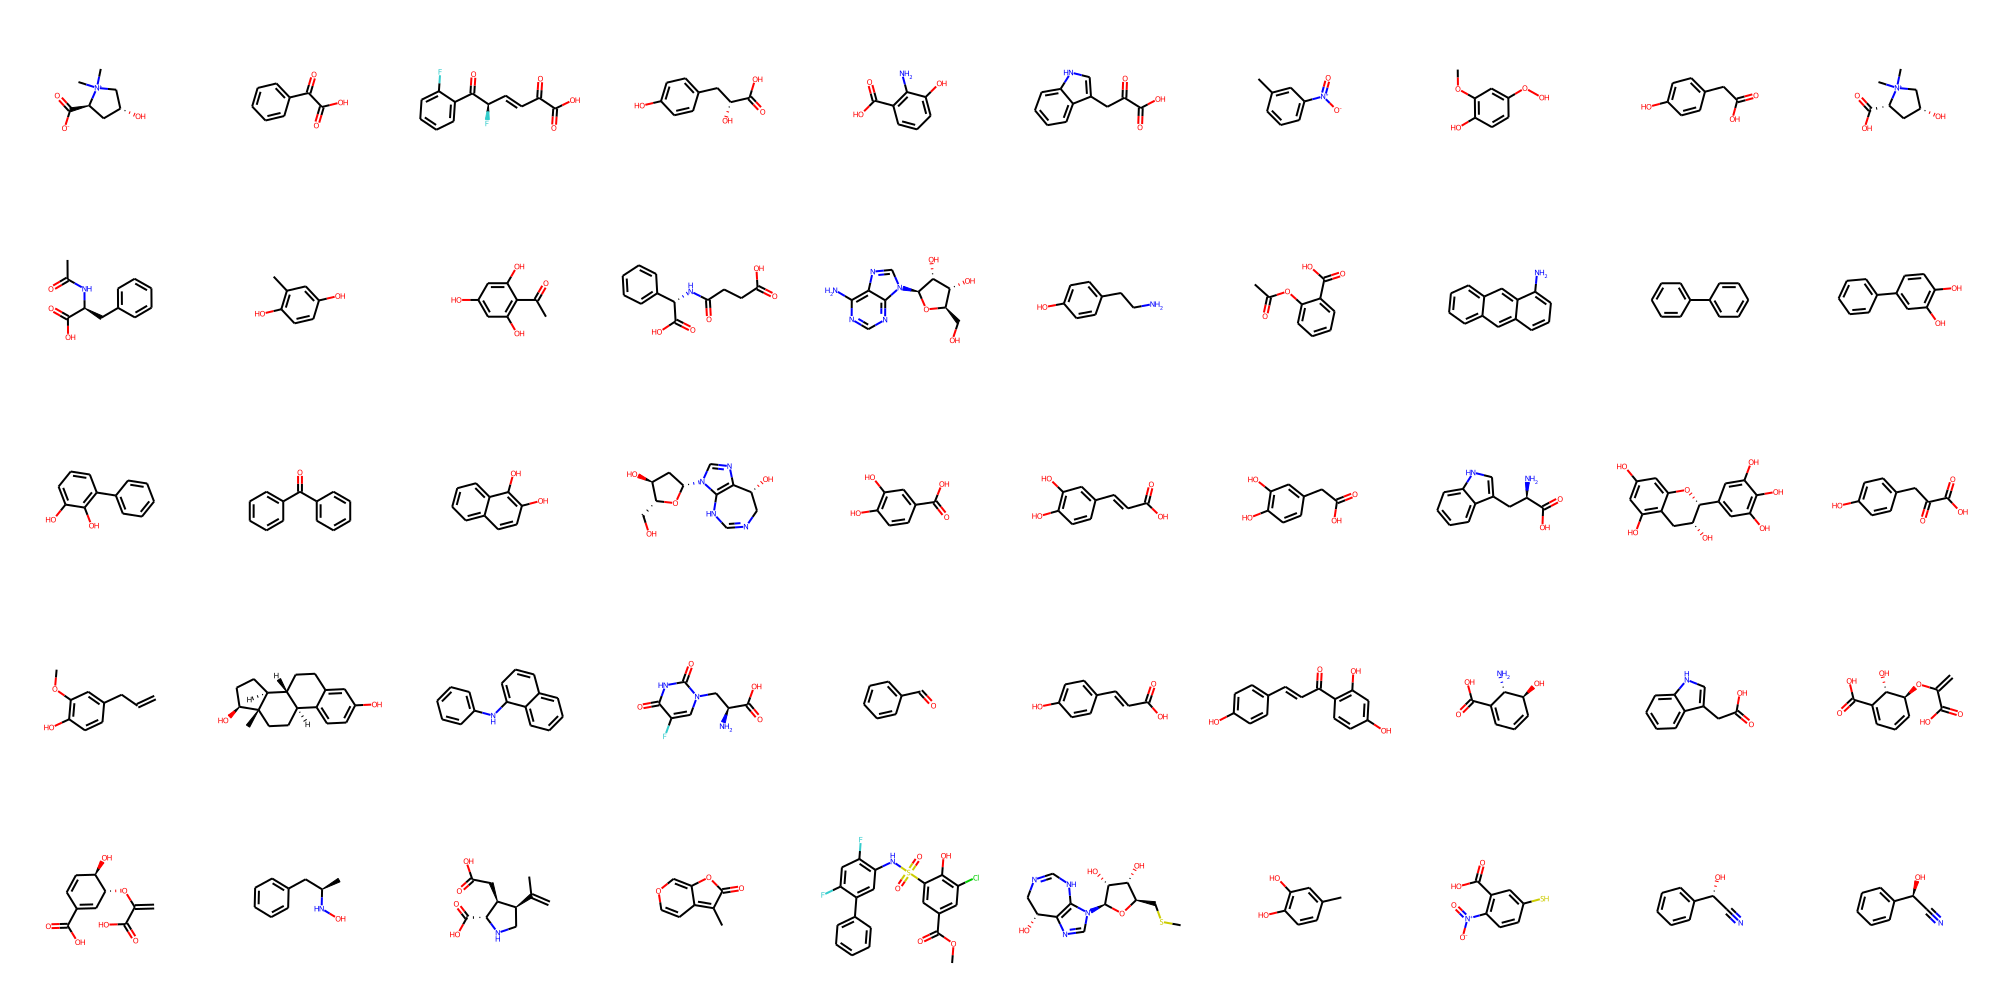

In [97]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([m for m in mols_std if m is not None],molsPerRow=10,subImgSize=(200,200))

In [102]:
import csv

with open(os.path.join(OUTPUT_PATH, "../pocketvec_hits.csv"), "w") as f:
    writer = csv.writer(f)
    for m in mols_std:
        if m is None:
            continue
        writer.writerow([Chem.MolToSmiles(m)])
        

with open(os.path.join(OUTPUT_PATH, "../pocketvec_mw250_hits.csv"), "w") as f:
    writer = csv.writer(f)
    for m in mols_std:
        if m is None:
            continue
        mw = MolWt(m)
        if mw < 250:
            continue
        writer.writerow([Chem.MolToSmiles(m)])
        

In [103]:
df = pd.read_csv(os.path.join(DATA, "murD_inhibition.csv"))
smiles = list(df[df["bin_act"] == 1]["SMILES"])

with open(os.path.join(OUTPUT_PATH, "../known_hits.csv"), "w") as f:
    writer = csv.writer(f)
    for smi in smiles:
        writer.writerow([smi])

## Docking hits

In [2]:
df = pd.read_csv(os.path.join(DATA, "docking/docking_MurD/structures/SagaMurD_Frag373/docking_scores_and_accessibilities_and_pocket_edist.tsv"), sep="\t")

smiles = list(df[df["class"] == 1]["smiles"])

with open(os.path.join(OUTPUT_PATH, "../docking_hits.csv"), "w") as f:
    writer = csv.writer(f)
    for smi in smiles:
        writer.writerow([smi])

In [4]:
df = df[df["class"] == 1]

In [5]:
with open(os.path.join(OUTPUT_PATH, "../docking_top100_hits.csv"), "w") as f:
    writer = csv.writer(f)
    smiles = df.sort_values(by="score").head(100)["smiles"]
    for smi in smiles:
        writer.writerow([smi])

with open(os.path.join(OUTPUT_PATH, "../docking_top1000_hits.csv"), "w") as f:
    writer = csv.writer(f)
    smiles = df.sort_values(by="score").head(1000)["smiles"]
    for smi in smiles:
        writer.writerow([smi])


In [118]:
from zairachem.tools.exmol.sampler import StonedSampler

In [119]:
smp = StonedSampler()

In [3]:
df

,title,score,pocket_edist,smiles,accessibility,MolWt,score/MolWt,class
0,D396-0181,-18.85070,0.467998,CC1(C)Cc2c(C#N)c(SCC(=O)Nc3ccc4ccccc4c3)nc(N3C...,0.404,488.61,-0.038580,0
1,8009-0167,-12.21080,2.917876,CC(CBr)n1ncnn1,0.157,191.03,-0.063921,0
2,5044-0010,-7.59264,9.114287,CCCCS(=O)(=O)N=C1NCN(CC(=O)[O-])CN1,0.325,277.33,-0.027378,0
3,N037-0036,-15.97440,2.293551,CC1CCC2C(C)C3CCC4(O)C(CC5C4CC(O)C4CC(O)CCC45C)...,0.320,431.66,-0.037007,0
4,3399-0213,-12.90590,7.442374,Cc1[nH]c(=S)[nH]c(=O)c1CCCO,0.407,200.26,-0.064446,0
...,...,...,...,...,...,...,...,...
300522,L426-0625,-10.09850,1.499124,CCCCNC(=O)C1(c2ccc(NS(=O)(=O)c3ccc(OC)c(OC)c3)...,0.349,446.57,-0.022613,0
300523,F294-0550,-7.24148,3.667831,CCCCN(CC)c1ccc(NS(=O)(=O)c2ccc(F)c(F)c2)cc1C(=O)O,0.296,412.46,-0.017557,0
300524,F295-0500,-11.27420,3.574957,CCN(CCN(C)C)c1ccc(C(=O)O)cc1NS(=O)(=O)c1ccc(C)...,0.358,419.55,-0.026872,0
300525,R052-1647,-16.72900,0.545912,Nc1c(Br)cc(NS(=O)(=O)c2ccccc2)cc1Br,0.142,406.10,-0.041194,1
